In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File and Directory Paths
source_dir = "source_files/"
source_metadata_file = source_dir + "papers.csv"
processed_metadata_file = source_dir + "papers_processed.csv"

table_output_dir = "extracted_tables/"
table_code_dir = table_output_dir + "table_code/"
table_images_dir = table_output_dir + "table_images/"
table_metadata_file = table_output_dir + "tables.csv"

figure_output_dir = "extracted_figures/"
figure_metadata_file = figure_output_dir + "figures.csv"

# CSV Size Limit
csv.field_size_limit(260000)

131072

In [73]:
def check_row_length(file_path, row_length):
    corrupted_objects = []
    with open(file_path, "r", encoding="utf-8") as metadata:
        spamreader = csv.reader(metadata, delimiter=';', quotechar='|', quoting=csv.QUOTE_ALL)
        for row in spamreader:
            if len(row) != row_length:
                corrupted_objects.append(row)
                print(f"Unexpected row length of {len(row)} for: {row[0]}")
    print(f"Check for {file_path} complete. {len(corrupted_objects)} rows were corrupted.")
    return corrupted_objects

# Check paper metadata files for errors
original_corrupted_papers = check_row_length(source_metadata_file, 3)
processed_corrupted_papers = check_row_length(processed_metadata_file, 5)

Check for source_files/papers.csv complete. 0 rows were corrupted.
Check for source_files/papers_processed.csv complete. 0 rows were corrupted.


In [25]:
# Repairing paper titels including a semicolumn
repaired_papers = {}
for paper_row in original_corrupted_papers:
    if len(paper_row) == 4:
        new_row = [paper_row[0], paper_row[1] + "," + paper_row[2], paper_row[3]]
        repaired_papers[paper_row[0]] = new_row
    else:
        raise ValueError(f"Unexpected row length for {paper_row}.")

print(f"{len(repaired_papers)} rows were fixed.")

42 rows were fixed.


In [26]:
# Fix for original source paper file
with open(source_metadata_file, "r", newline='', encoding='utf-8') as input_file:
        with open(source_dir + "tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[0] in repaired_papers:
                    csv_writer.writerow(repaired_papers[row[0]])
                else:
                    csv_writer.writerow(row)
                    
# Replace old csv file with new csv file
os.replace(source_dir + "tmp.csv", source_metadata_file)
print("Original papers csv file was successfully overwritten.")

# Fix for processed paper file
with open(processed_metadata_file, "r", newline='', encoding='utf-8') as input_file:
        with open(source_dir + "tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[0] in repaired_papers:
                    if len(row) > paper_processed_row_length:
                        new_row = repaired_papers[row[0]] + [row[-2], row[-1]]
                        csv_writer.writerow(new_row)
                    else:
                        print(f"Critical error for {row}. Please fix it manually.")
                        csv_writer.writerow(row)
                else:
                    csv_writer.writerow(row)
                    
# Replace old csv file with new csv file
os.replace(source_dir + "tmp.csv", processed_metadata_file)

print("Processed papers csv file was successfully overwritten.")

Original papers csv file was successfully overwritten.
Processed papers csv file was successfully overwritten.


In [45]:
# Checking if unprocessed ppaers are still on the disk
for paper_row in processed_corrupted_papers:
    if len(paper_row) != 3:
        print(paper_row)
    else:
        paper_id = paper_row[0]
        if not os.path.isdir(source_dir+paper_id):
            raise ValueError(f"No files found for paper {paper_id}")
            
paper_ids = [row[0] for row in processed_corrupted_papers]
critical_figs = []
critical_tabs = []

# Remove critical figures to allow for reprocessing
with open(figure_metadata_file, "r", newline='', encoding='utf-8') as input_file:
        with open(figure_output_dir + "tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[1] not in paper_ids:
                    csv_writer.writerow(row)
                else:
                    critical_figs.append(row[0])
os.replace(figure_output_dir + "tmp.csv", figure_metadata_file)

# Remove critical figures to allow for reprocessing
with open(table_metadata_file, "r", newline='', encoding='utf-8') as input_file:
        with open(table_output_dir + "tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[1] not in paper_ids:
                    csv_writer.writerow(row)
                else:
                    critical_tabs.append(row[0])
os.replace(table_output_dir + "tmp.csv", table_metadata_file)

print(f"{len(critical_figs)} figures and {len(critical_tabs)} have been removed.")

5 figures and 6 were removed.


In [49]:
# Removing these unprocessed papers from csv file
with open(processed_metadata_file, "r", newline='', encoding='utf-8') as input_file:
        with open(source_dir + "tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[0] not in paper_ids:
                    csv_writer.writerow(row)
                    
# Replace old csv file with new csv file
os.replace(source_dir + "tmp.csv", processed_metadata_file)

print("Processed papers csv file was successfully overwritten.")

Processed papers csv file was successfully overwritten.


In [7]:
# Checking metadata files for double occurrences
def check_for_double(file_path):
    with open(file_path, "r", newline='', encoding='utf-8') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        id_set = set()
        for row in spamreader:
            if row[0] in id_set:
                print(f"Double finding of {row[0]}")
            id_set.add(row[0])
    print(f"Check for {file_path} completed.")
    
check_for_double(source_metadata_file)
check_for_double(processed_metadata_file)
check_for_double(figure_metadata_file)
check_for_double(table_metadata_file)

Check for source_files/papers.csv completed.
Check for source_files/papers_processed.csv completed.
Check for extracted_figures/figures.csv completed.
Check for extracted_tables/tables.csv completed.


In [74]:
# Table and Figure checks

table_rows = check_row_length(table_metadata_file, 5)
figure_rows = check_row_length(figure_metadata_file, 5)

print(len(table_rows), len(figure_rows))

Check for extracted_tables/tables.csv complete. 0 rows were corrupted.
Check for extracted_figures/figures.csv complete. 0 rows were corrupted.
0 0


In [69]:
for i in range(len(table_rows)):
    table_rows[i][4] = ";".join(table_rows[i][4:])
    table_rows[i] = table_rows[i][:5]
    
for i in range(len(figure_rows)):
    figure_rows[i][4] = ";".join(figure_rows[i][4:])
    figure_rows[i] = figure_rows[i][:5]


for row in table_rows:
    if len(row) != 5:
        print("Error!", row[0], len(row))
        
for row in figure_rows:
    if len(row) != 5:
        print("Error!", row[0], len(row))
        
print("Complete")

Complete


In [15]:
import regex as re

def refine_caption(file_path):
    caption_regex = r"\\caption\{(([^{}]*(\{[^{}]*\})?[^{}]*)+)\}"
    refined_captions = {}
    counter = 0
    with open(file_path, "r", newline='', encoding='utf-8') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        for row in spamreader:
            caption_match = re.search(caption_regex, row[3])
            if caption_match:
                refined_captions[row[0]] = caption_match.group(1)
            else:
                counter += 1
        
    print(f"{counter} errors found.")
    return refined_captions
                
table_captions = refine_caption(table_metadata_file)
figure_captions = refine_caption(figure_metadata_file)
print("Check complete.")

2800 errors found.
33511 errors found.
Check complete.


In [32]:
# Replacing semicolons in captions
for cap in figure_captions:
    if ";" in figure_captions[cap]:
        figure_captions[cap] = figure_captions[cap].replace(";", ",")
        
for cap in table_captions:
    if ";" in table_captions[cap]:
        table_captions[cap] = table_captions[cap].replace(";", ",")

0


In [43]:
# Remove objects with mismatched caption regex
def replace_objects(file_path, obj_dic, table=True):
    with open(file_path, "r", newline='', encoding='utf-8') as input_file:
        with open("tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            for row in csv_reader:
                if row[0] in obj_dic:
                    row[3] = obj_dic[row[0]]
                    csv_writer.writerow(row)
                else:
                    if table:
                        if os.path.isfile(table_code_dir + row[0] + ".tex"):
                            os.remove(table_code_dir + row[0] + ".tex")
                        if os.path.isfile(table_images_dir + row[0] + ".png"):
                            os.remove(table_images_dir + row[0] + ".png")
                    else:
                        for ext in [".png", ".jpg", ".jpeg"]:
                            if os.path.isfile(figure_output_dir + row[0] + ext):
                                os.remove(figure_output_dir + row[0] + ext)
                                break
                    
    # Replace old csv file with new csv file
    os.replace("tmp.csv", file_path)

    print("CSV file was successfully overwritten.")
    
replace_objects(table_metadata_file, table_captions)
replace_objects(figure_metadata_file, figure_captions, False)

CSV file was successfully overwritten.
0
CSV file was successfully overwritten.
0


In [111]:
def analyze_text_mentions(file_path):
    mention_lengths = np.array([])
    with open(file_path, "r", newline='', encoding='utf-8') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for row in spamreader:
            if len(row) == 5:
                mention_lengths = np.append(mention_lengths, len(row[-1].split()))
            else:
                raise ValueError(f"Unexpected row length for {row[0]}.")
    
    # Statistics
    print("Number of samples:", len(mention_lengths))
    print("Lowest value:", mention_lengths.min())
    print("Highest value:", mention_lengths.max())
    print("Average value:", np.average(mention_lengths))
    print("Median value:", np.median(mention_lengths))
    
    # Filtering large lengths
    filtered_mention_lengths_1000 = [x for x in mention_lengths if x <= 1000]
    filtered_mention_lengths_400 = [x for x in filtered_mention_lengths_1000 if x <= 400]
    print("Number of objects with a text mention word length above 1000:", len(mention_lengths)-len(filtered_mention_lengths_1000))
    print("Number of objects with a text mention word length above 400:", len(mention_lengths)-len(filtered_mention_lengths_400))
    
    # Plotting the figures
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    axes[0].hist(filtered_mention_lengths_1000, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title("Distribution of Text Mention Word Lengths (under 1000 words)", fontsize=10)
    axes[0].set_xlabel("Word Length", fontsize=12)
    axes[0].set_ylabel("Frequency", fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1].hist(filtered_mention_lengths_400, bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_title("Distribution of Text Mention Word Lengths (under 400 words)", fontsize=10)
    axes[1].set_xlabel("Word Length", fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Number of samples: 33993
Lowest value: 40.0
Highest value: 10660.0
Average value: 190.30041479128056
Median value: 133.0
Number of objects with a text mention word length above 1000: 296
Number of objects with a text mention word length above 400: 2817


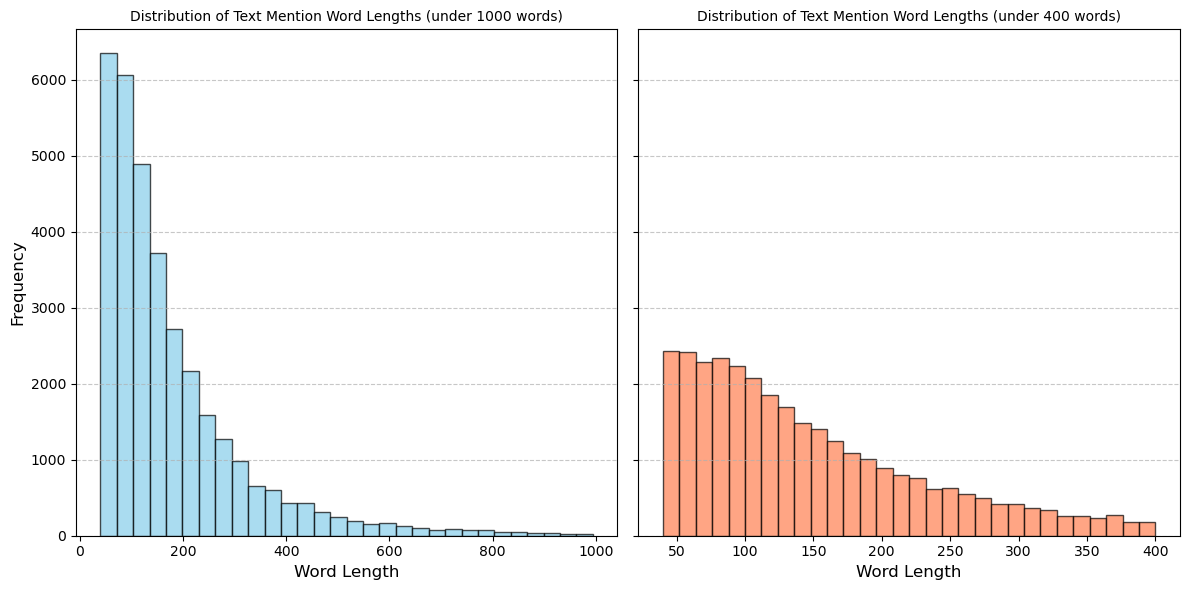

In [112]:
analyze_text_mentions(table_metadata_file)

Number of samples: 224497
Lowest value: 40.0
Highest value: 24090.0
Average value: 190.6322801641002
Median value: 135.0
Number of objects with a text mention word length above 1000: 1725
Number of objects with a text mention word length above 400: 19849


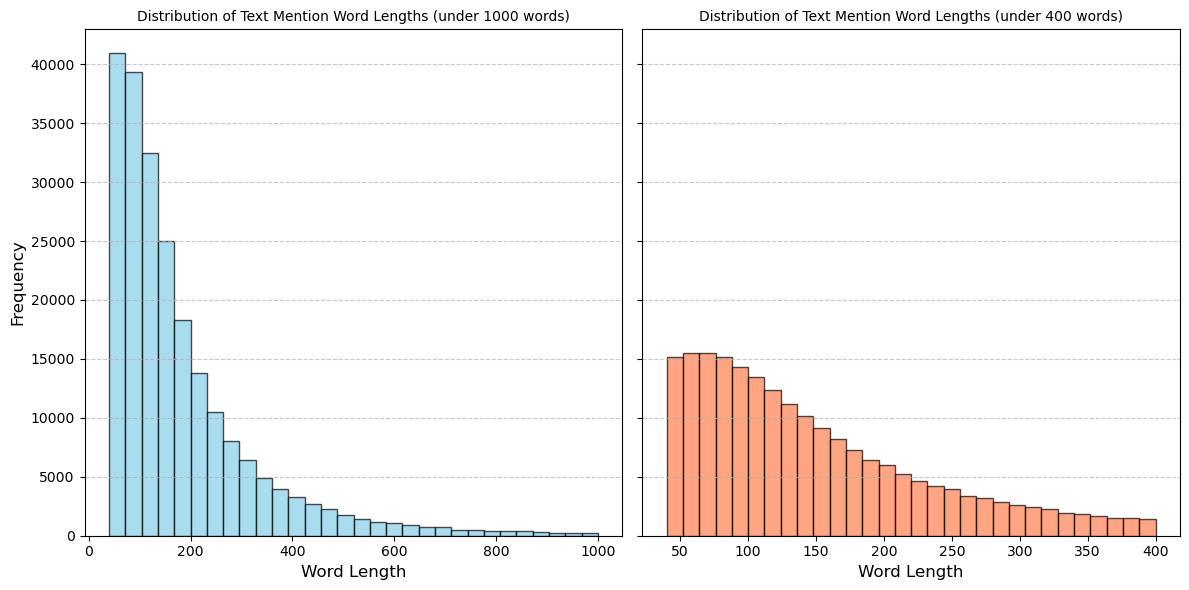

In [113]:
analyze_text_mentions(figure_metadata_file)

In [115]:
def check_word_length(file_path, threshold):
    corrupted_objects = []
    with open(file_path, "r", newline='', encoding='utf-8') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for row in spamreader:
            if len(row) == 5:
                if len(row[-1].split()) > threshold:
                    corrupted_objects.append(row[0])
            else:
                raise ValueError(f"Unexpected row length for {row[0]}.")
    return corrupted_objects

WORD_MAX_THRESHOLD = 300
corrupted_tables = check_word_length(table_metadata_file, WORD_MAX_THRESHOLD)
corrupted_figures = check_word_length(figure_metadata_file, WORD_MAX_THRESHOLD)

print(len(corrupted_tables), len(corrupted_figures))

5008 35049


In [117]:
def remove_objects(file_path, obj_list, table=True):
    with open(file_path, "r", newline='', encoding='utf-8') as input_file:
        with open("tmp.csv", "w", newline='', encoding='utf-8') as output_file:
            csv_reader = csv.reader(input_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            csv_writer = csv.writer(output_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            
            counter = 0
            for row in csv_reader:
                if row[0] in obj_list: # Delete object
                    counter += 1
                    if table:
                        if os.path.isfile(table_code_dir + row[0] + ".tex"):
                            os.remove(table_code_dir + row[0] + ".tex")
                        if os.path.isfile(table_images_dir + row[0] + ".png"):
                            os.remove(table_images_dir + row[0] + ".png")
                    else:
                        for ext in [".png", ".jpg", ".jpeg"]:
                            if os.path.isfile(figure_output_dir + row[0] + ext):
                                os.remove(figure_output_dir + row[0] + ext)
                                break
                else:
                    csv_writer.writerow(row)
                    
    # Replace old csv file with new csv file
    os.replace("tmp.csv", file_path)

    print(f"CSV file was successfully overwritten. {counter} objects have been removed.")
    
remove_objects(table_metadata_file, corrupted_tables)
remove_objects(figure_metadata_file, corrupted_figures, False)

CSV file was successfully overwritten. 5008 objects have been removed.
CSV file was successfully overwritten. 35049 objects have been removed.


In [6]:
# Delete figure files from disk that are not part of the csv file
figure_files = set(x.replace(".png", "") for x in os.listdir(figure_output_dir) if x.endswith(".png"))

with open(figure_metadata_file, "r", newline='', encoding='utf-8') as csv_file:
    spamreader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in spamreader:
        figure = row[0]
        if figure in figure_files:
            figure_files.remove(figure)
            
print(f"{len(figure_files)} figures will be removed.")
for figure in figure_files:
    os.remove(figure_output_dir + figure + ".png")

32 figures will be removed.
